## Hoja de Trabajo #4
### Jennifer Sandoval 18962
### Luis Quezada        18028
### Esteban del Valle  18221

In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
import statsmodels.api as sm
from sklearn import linear_model
import scipy.stats as stats

#### Debido a que la base de datos utilizada ya fue analizada y limpiada previamente, se utiliza la version de train-clean.csv

In [3]:
dataset = pd.read_csv('train-clean.csv')
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LandSlope,Condition1,BldgType,OverallQual,OverallCond,YearBuilt,CentralAir,GarageArea,PoolArea,YrSold,SaleType,SalePrice
0,60,6.0,65.0,8450,2.0,1.0,1.0,1.0,3.0,1.0,7,5,2003,1.0,548,0,2008,2.0,208500
1,20,6.0,80.0,9600,2.0,1.0,1.0,1.0,2.0,1.0,6,8,1976,1.0,460,0,2007,2.0,181500
2,60,6.0,68.0,11250,2.0,2.0,1.0,1.0,3.0,1.0,7,5,2001,1.0,608,0,2008,2.0,223500
3,70,6.0,60.0,9550,2.0,2.0,1.0,1.0,3.0,1.0,7,5,1915,1.0,642,0,2006,2.0,140000
4,60,6.0,84.0,14260,2.0,2.0,1.0,1.0,3.0,1.0,8,5,2000,1.0,836,0,2008,2.0,250000


In [4]:
X = dataset.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]].values
Y = dataset.iloc[:, 18].values

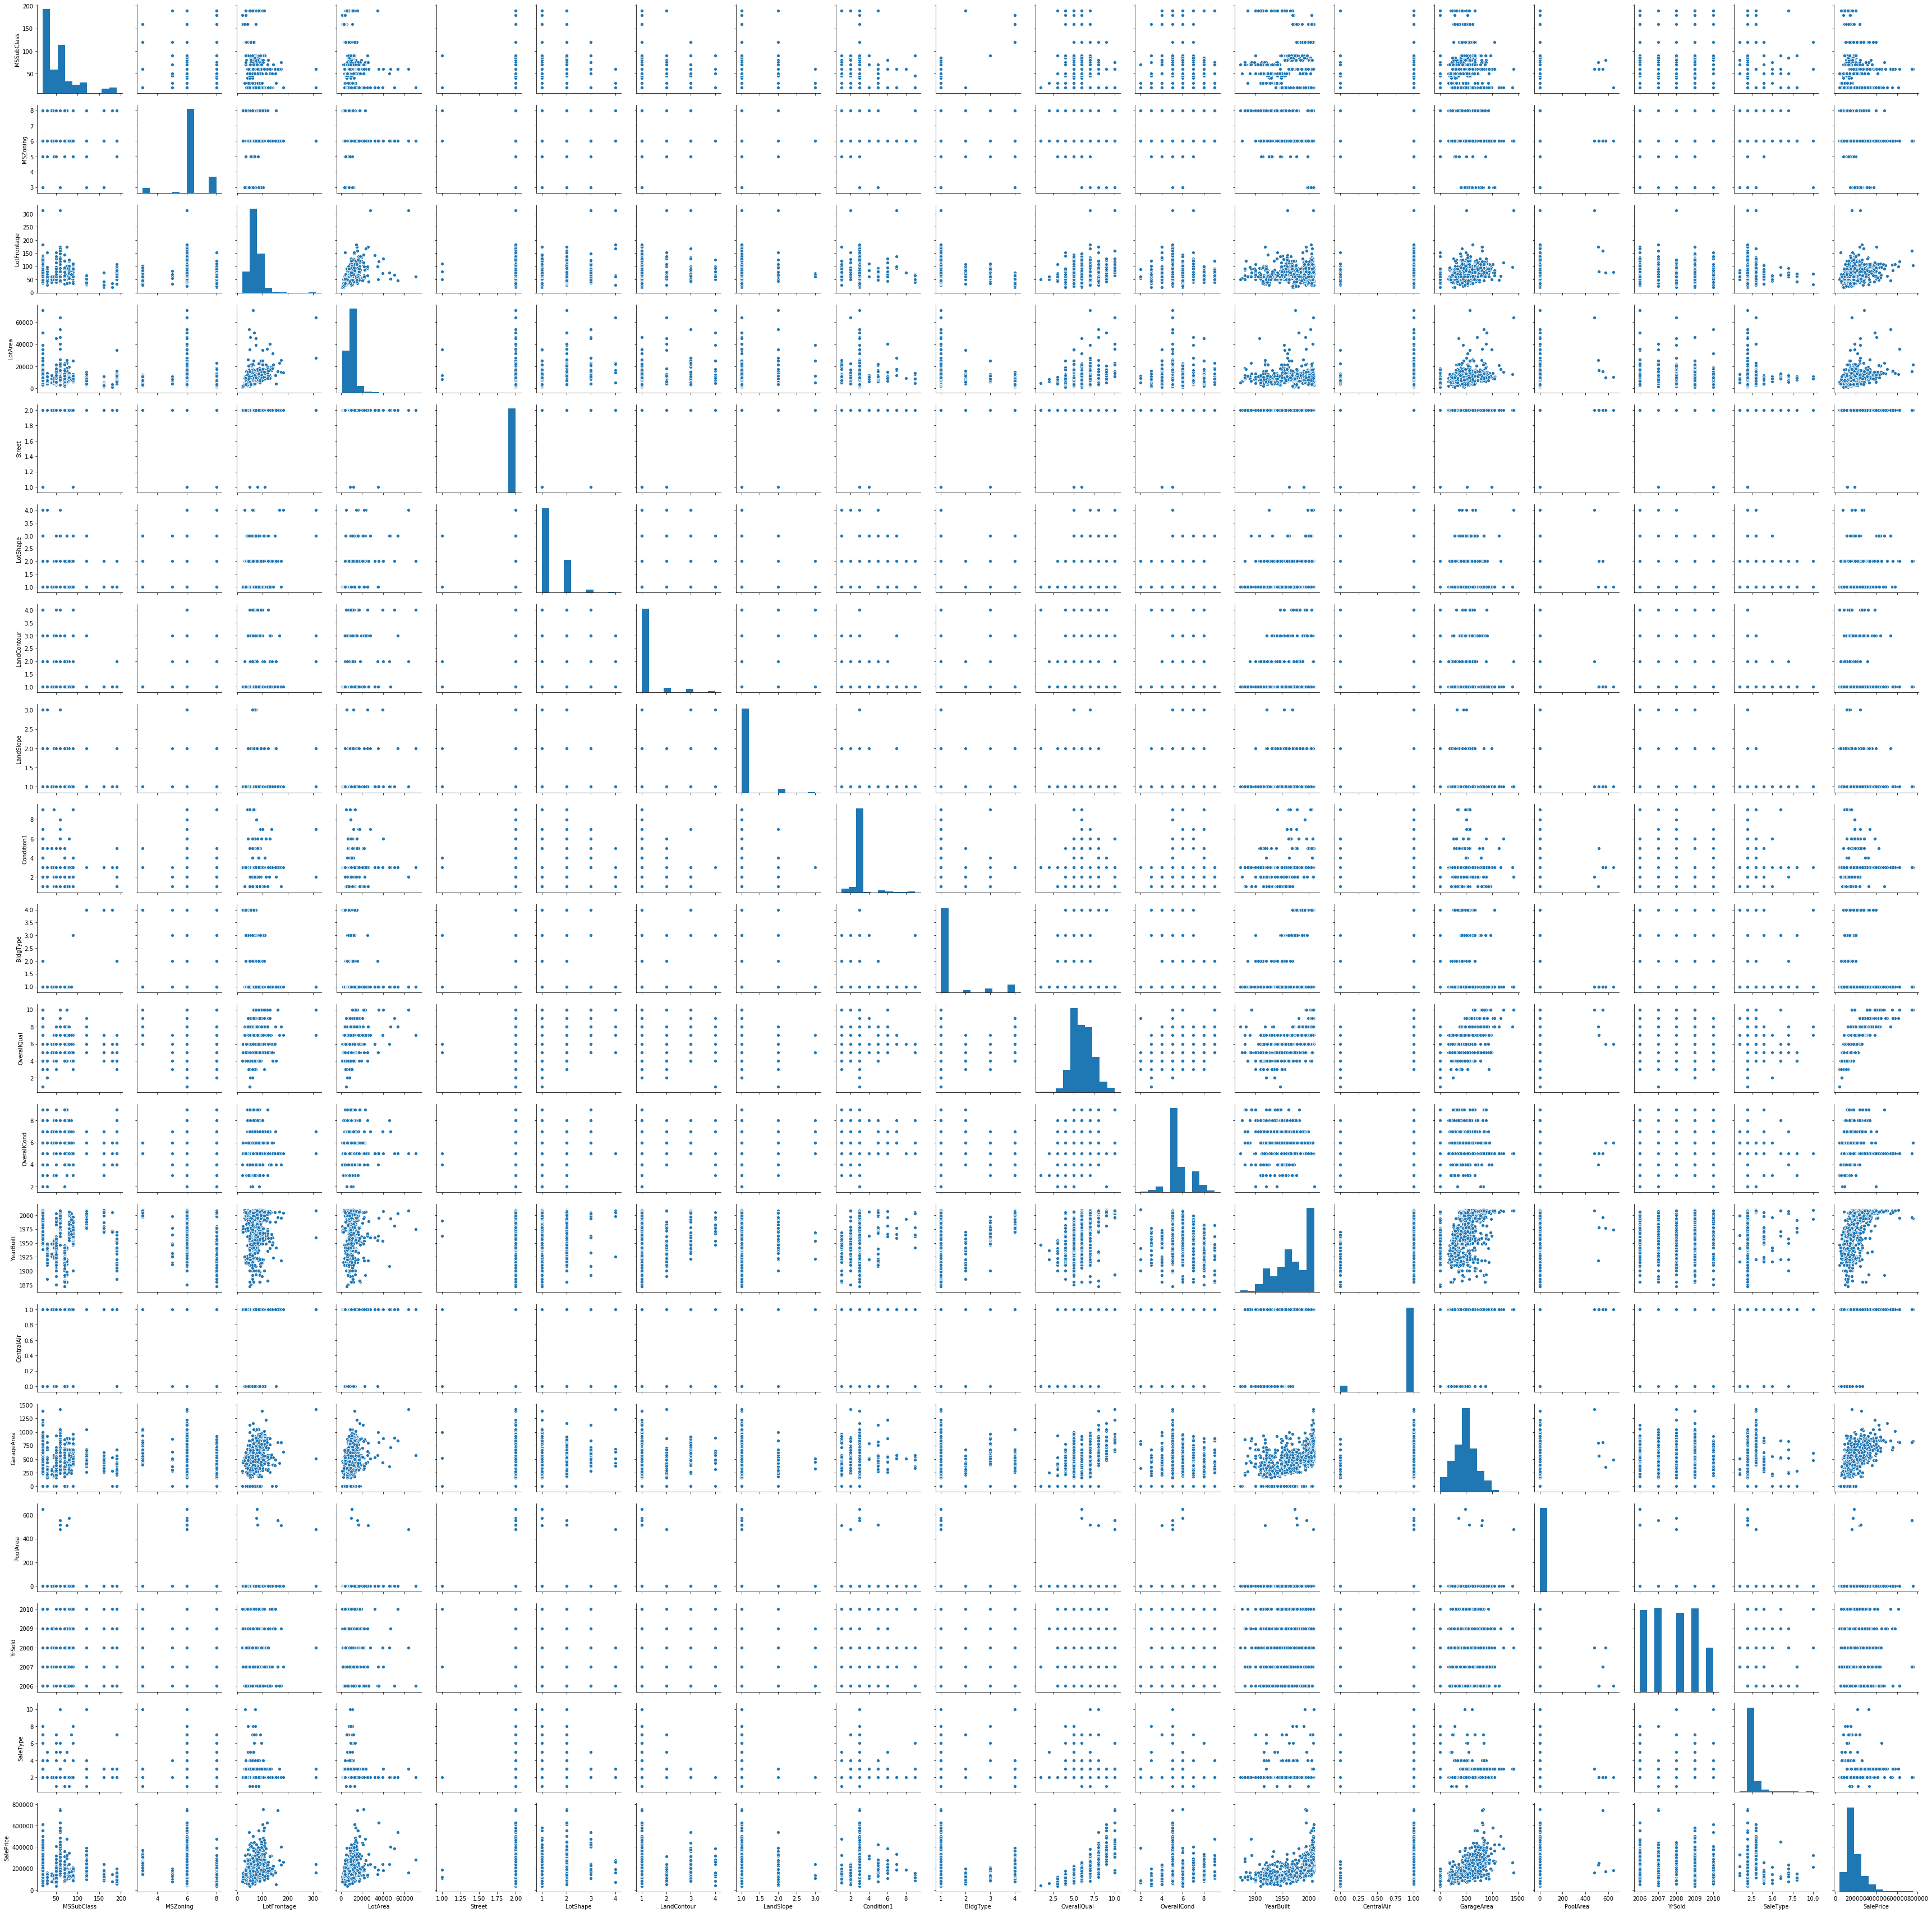

In [5]:
sns.pairplot(dataset)

Según las gráficas realizadas anteriormente es posible observar que la variable que presenta una forma aproximadamente lineal es la variable de OverallQual vs SalePrice

## Diagramas de dispersión para observar linealidad

Debido a que se observó que la forma de la relación entre las variables OverallQual y SalePrice tenía una forma aproximadamente lineal, se decidió representar está relación individualmente.

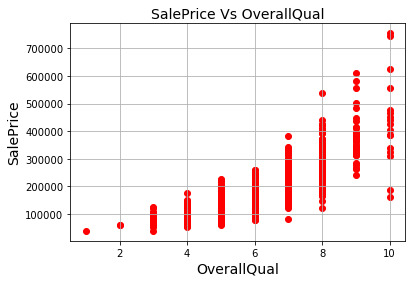

In [5]:
plt.scatter(dataset['OverallQual'], dataset['SalePrice'], color='red')
plt.title('SalePrice Vs OverallQual', fontsize=14)
plt.xlabel('OverallQual', fontsize=14)
plt.ylabel('SalePrice', fontsize=14)
plt.grid(True)
plt.show()

## Análisis de multicolinealidad

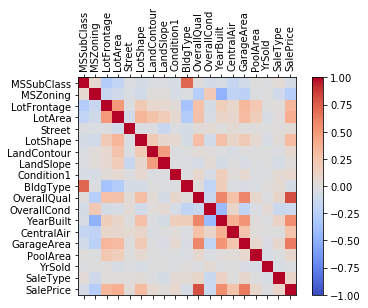

In [6]:
corr = dataset.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(dataset.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(dataset.columns)
ax.set_yticklabels(dataset.columns)
plt.show()

En esta gráfica se puede observar por medio de los colores la correlación que existe entre las variables presentes en el modelo. De existir variables con una coloración rojo intenso como la que se observa en la diagonal, estas deberían ser eliminadas dado que presentan multicolinealidad. 
Es posible observar que las variables BldgType y MSSubClass tienen un alto nivel de correlación por lo que se procederá a utilizar unicamente 1 de ellas, debido a que las dos aportan la misma información al modelo

In [8]:
X = dataset.iloc[:,[0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17]].values
Y = dataset.iloc[:, 18].values

## Modelo de regresión lineal múltiple

Para formar el modelo se realizaron pruebas en las que se eliminaban las variables que tenían menor significancia para el módelo, sin embargo, se llegó a la conclusión que todas las variables presentadas eran necesarias para que la precisión del modelo no descendiera de forma drástica. El valor de precisión obtenido es el valor máximo que se puede obtener.

In [12]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()

In [14]:
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     169.0
Date:                Sun, 22 Mar 2020   Prob (F-statistic):          7.60e-296
Time:                        17:37:46   Log-Likelihood:                -13938.
No. Observations:                1150   AIC:                         2.791e+04
Df Residuals:                    1132   BIC:                         2.800e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.225e+06   2.01e+06     -0.609      0.5

### R^2 = 0.72

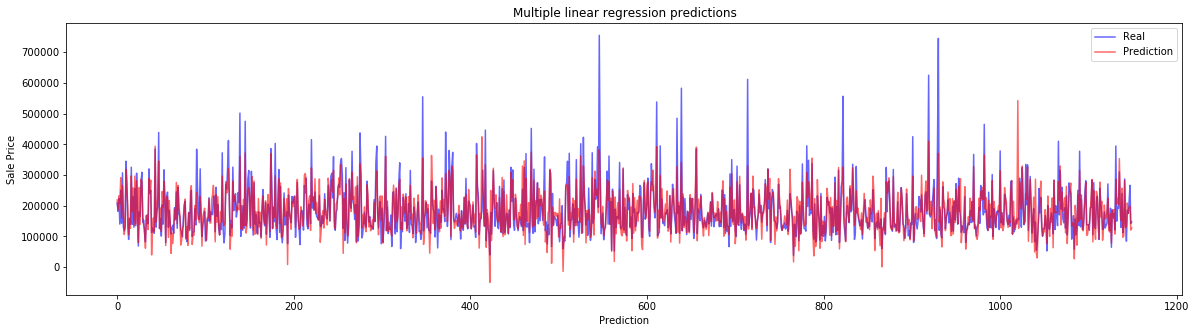

In [15]:
plt.figure(figsize=(20,5))
plt.plot(range(len(Y)), Y,'b',label='Real',alpha=0.6)
plt.plot(range(len(predictions)), predictions,c='r',label='Prediction',alpha=0.6)
plt.title('Multiple linear regression predictions')
plt.xlabel('Prediction')
plt.ylabel('Sale Price')
plt.legend()
plt.show()

En esta gráfica es posible observar los valores reales y los valores predichos por el modelo. Se observan picos azules sobresalientes en los cuales la predicción se encuentra alejada del valor real. Es posible que estos datos sean los que contribuyan a obtener una confiabilidad de 72%

In [16]:
residual_values = model.resid
residual_values

array([-10269.69823554,  -4823.76641967,  -8813.4509914 , ...,
        68722.6290075 ,  21642.82193819,  19930.96097507])

## Análisis de residuos

A continuación se analizaran los residuos para corroborar que el modelo puede ser utilizado

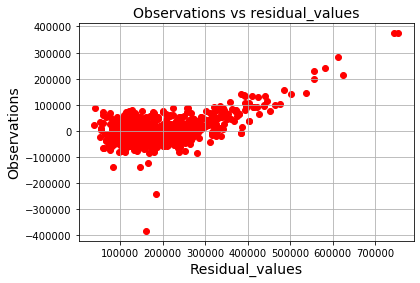

In [17]:
plt.scatter(dataset['SalePrice'],residual_values, color='red')
plt.title('Observations vs residual_values', fontsize=14)
plt.xlabel('Residual_values', fontsize=14)
plt.ylabel('Observations', fontsize=14)
plt.grid(True)
plt.show()

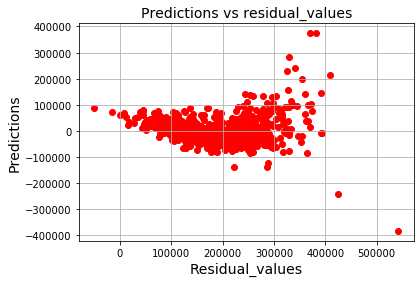

In [18]:
plt.scatter(predictions,residual_values, color='red')
plt.title('Predictions vs residual_values', fontsize=14)
plt.xlabel('Residual_values', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.grid(True)
plt.show()

Se puede observar que en ambos gráficos los datos se encuentran distribuidos uniformemente, a excepción de ciertos datos atípicos, y no se presentan agrupaciones, comprobando así el supuesto de varianza constante. 

## Gráfico de probabilidad normal de residuos

Text(0.5, 1.0, 'Normal Q-Q Plot')

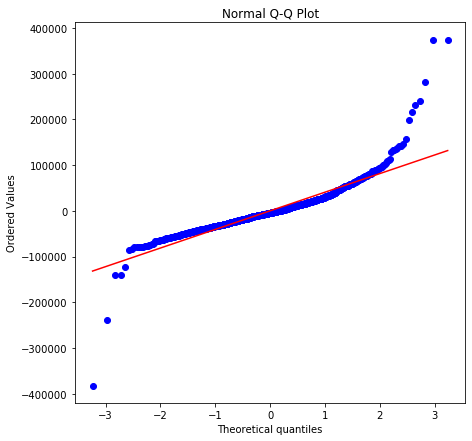

In [19]:
plt.figure(figsize=(7,7))
stats.probplot(residual_values, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

Es posible observar que los datos residuales se encuentran dentro de lo establecido, sin embargo, se observan datos atípicos que no siguen la distribución normal.

## Histograma de Residuos

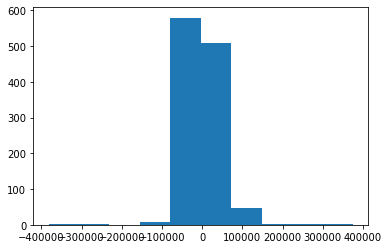

In [20]:
plt.hist(residual_values)
plt.show()

Se observa que la distribución de los datos es aproximadamente normal, sin embargo, se recomendaría realizar más pruebas para corroborar la información proporcionada por el modelo.

## Media de Residuos 

In [21]:
np.mean(residual_values)

2.5268198679322782e-09

Es posible observar que debido a que el valor de la media es muy pequeño por lo que puede ser aproximado a 0, cumpliendo así con uno de los supuestos de la regresión lineal multiple

## Predicción de datos de prueba

Debido a que se analizó la calidad del modelo, es posible llevar a cabo la predicción para el conjunto de datos de prueba 

In [22]:
def rpl(dataset,col,alf1,alf2):
    for index in range(len(alf1)):
        dataset[col] = dataset[col].str.replace(alf1[index],str(alf2[index]))
    dataset[col] = dataset[col].astype('float64')
testData = pd.read_csv('test.csv')
testData = testData[['MSSubClass','MSZoning','LotFrontage','LotArea','Street','LotShape','LandContour','LandSlope','Condition1','BldgType','OverallQual','OverallCond','YearBuilt','CentralAir','GarageArea','PoolArea','YrSold','SaleType']]

testData = testData[testData.MSZoning != 'C (all)']
rpl(testData,'MSZoning',['A','C','FV','I','RH','RL','RP','RM'],[1,2,3,4,5,6,7,8])

rpl(testData,'Street',['Grvl','Pave'],[1,2])
rpl(testData,'LotShape',['Reg','IR1','IR2','IR3'],[1,2,3,4])
rpl(testData,'LandContour',['Lvl','Bnk','HLS','Low'],[1,2,3,4])
rpl(testData,'LandSlope',['Gtl','Mod','Sev'],[1,2,3])
rpl(testData,'Condition1',['Artery','Feedr','Norm','RRNn','RRAn','PosN','PosA','RRNe','RRAe'],[1,2,3,4,5,6,7,8,9])
testData = testData[testData.BldgType != 'Twnhs']
rpl(testData,'BldgType',['1Fam','2FmCon','Duplx','TwnhsE','TwnhsI','2fmCon','Duplex'],[1,2,3,4,5,2,3])
rpl(testData,'CentralAir',['N','Y'],[0,1])
rpl(testData,'SaleType',['CWD','WD','New','COD','ConLw','ConLI','ConLD','Oth','VWD','Con'],[1,2,3,4,5,6,7,8,9,10])

# Eliminar filas con datos faltantes
testData.dropna(inplace=True)
testData

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LandSlope,Condition1,BldgType,OverallQual,OverallCond,YearBuilt,CentralAir,GarageArea,PoolArea,YrSold,SaleType
0,20,5.0,80.0,11622,2.0,1.0,1.0,1.0,2.0,1.0,5,6,1961,1.0,730.0,0,2010,2.0
1,20,6.0,81.0,14267,2.0,2.0,1.0,1.0,3.0,1.0,6,6,1958,1.0,312.0,0,2010,2.0
2,60,6.0,74.0,13830,2.0,2.0,1.0,1.0,3.0,1.0,5,5,1997,1.0,482.0,0,2010,2.0
3,60,6.0,78.0,9978,2.0,2.0,1.0,1.0,3.0,1.0,6,6,1998,1.0,470.0,0,2010,2.0
4,120,6.0,43.0,5005,2.0,2.0,3.0,1.0,3.0,4.0,8,5,1992,1.0,506.0,0,2010,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,20,6.0,80.0,13384,2.0,1.0,1.0,2.0,3.0,1.0,5,5,1969,1.0,336.0,0,2006,2.0
1455,160,8.0,21.0,1894,2.0,1.0,1.0,1.0,3.0,4.0,4,5,1970,1.0,286.0,0,2006,2.0
1456,20,6.0,160.0,20000,2.0,1.0,1.0,1.0,3.0,1.0,5,7,1960,1.0,576.0,0,2006,2.0
1457,85,6.0,62.0,10441,2.0,1.0,1.0,1.0,3.0,1.0,5,5,1992,1.0,0.0,0,2006,2.0


In [25]:
X_test = testData.iloc[:, [0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]].values
yP= -1.225e+06 -(24.7882*(testData['MSSubClass']))-(338.0376*(testData['MSZoning']))+(79.3348 *(testData['LotFrontage']))+ (2.2518 *(testData['LotArea']))+ (4.705e+04 *(testData['Street']))+  (3417.6340*(testData['LotShape'])) -(4025.9731*(testData['LandContour']))+ (1.867e+04 *(testData['LandSlope']))-(1054.8467 *(testData['Condition1']))+ (3.551e+04 *(testData['OverallQual']))+  (3593.8172*(testData['OverallCond']))+ (268.9030* (testData['YearBuilt'])) -(6019.3103*(testData['CentralAir']))+ (68.6828*(testData['GarageArea'])) +(3.2926*(testData['PoolArea']))+ (234.9989 * (testData['YrSold']))+ (2481.6419 *(testData['SaleType']))
for y in (yP):
    print(y)

163245.11179999998
177299.0879
157827.65550000008
188019.5877
232790.77569999994
180832.3067
174398.33609999987
218832.22130000003
103039.91570000004
208468.58829999968
324084.43139999994
297023.46359999996
309529.2666000001
282016.4358999996
346280.4329
283157.67850000015
247727.2512999998
205474.00189999977
196882.87309999982
222853.42529999968
214663.1310999999
308014.4846999999
280433.7256999998
237504.57279999997
190396.0410999999
222831.43090000006
128828.04949999988
185802.7853999998
281838.9236999998
270501.06770000025
207762.83829999992
207123.9771
210724.89100000003
294204.6129999999
258731.21469999995
223958.03129999983
194702.73649999997
174657.26070000013
138565.9137
153404.57040000006
145097.8919000002
133671.47269999978
134391.01370000004
193738.13129999998
178255.8062999999
137846.08579999997
224511.46530000007
130964.30689999982
169732.23029999997
79702.8537
131628.69849999997
132505.61809999993
124862.96149999989
105378.5433000001
161914.30990000008
139206.3978999999


293301.8613000002
207033.2889
216377.46149999992
256045.74509999968
148507.09389999977
210563.37090000013
140180.1300000001
138177.94839999996
182178.66280000014
126441.6678000002
148952.42189999975
158811.10730000006
138837.2973000003
131891.00329999984
153942.80569999988
124127.43349999996
136509.7631
124886.01760000005
119168.98509999996
117683.97630000007
121629.38729999986
181391.19009999963
121844.56460000019
128464.46729999999
165239.47689999986
162490.18010000009
129077.2385
167401.59030000019
147699.9037
125267.21729999993
130193.29720000012
135596.13870000016
256670.79830000017
170360.41689999987
189413.5369000001
174688.67350000006
59522.98849999988
70398.23959999988
72559.37610000008
164582.8370999998
99691.04950000001
158933.1438999997
156097.3268999999
168922.83189999996
207224.3122999999
112154.58410000018
52847.740399999915
97776.12169999981
112165.63230000003
210453.79430000004
125028.63750000004
94143.40550000002
137096.21609999964
116202.36409999998
64637.78799999990